# Introduction to Data Visualization in Python

## Import Datasets

We are going to use two datasets in this tutorial. The [Iris](https://archive.ics.uci.edu/ml/datasets/iris) and the [Wine Reviews](https://www.kaggle.com/zynicide/wine-reviews) dataset.

In [1]:
%matplotlib inline  
import pandas as pd
import numpy as np

In [2]:
iris = pd.read_csv('iris.csv', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
wine_reviews = pd.read_csv('winemag-data-130k-v2.csv', index_col=0)
wine_reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## Matplotlib

Matplotlib is a Python plotting libary.

In [4]:
import matplotlib.pyplot as plt

### Scatter plot

Text(0, 0.5, 'sepal_width')

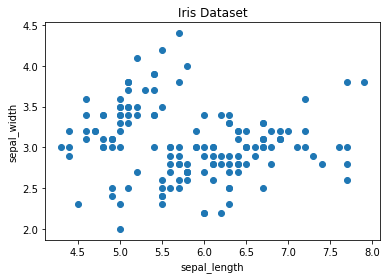

In [5]:
# create a figure and axis
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(iris['sepal_length'], iris['sepal_width'])
# set a title and labels
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')

We can color each point by class

Text(0, 0.5, 'sepal_width')

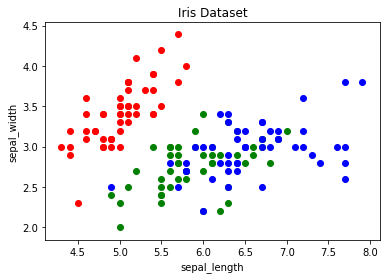

In [6]:
colors = {'Iris-setosa':'r', 'Iris-versicolor':'g', 'Iris-virginica':'b'}
fig, ax = plt.subplots()
for i in range(len(iris['sepal_length'])):
    ax.scatter(iris['sepal_length'][i], iris['sepal_width'][i],color=colors[iris['class'][i]])
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')

### Line Chart

In [7]:
iris.shape[0]

150

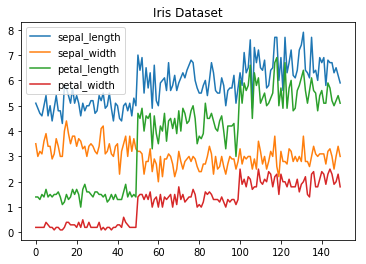

In [8]:
columns = iris.columns.drop(['class'])
x_data = range(0, iris.shape[0])
fig, ax = plt.subplots()
for column in columns:
    ax.plot(x_data, iris[column])
ax.set_title('Iris Dataset')
ax.legend()

### Histogram

Text(0, 0.5, 'Frequency')

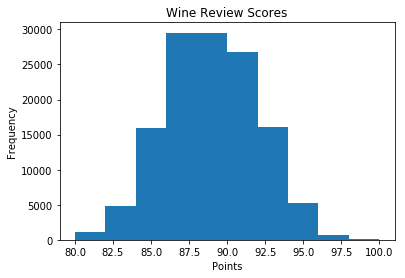

In [9]:
fig, ax = plt.subplots()
ax.hist(wine_reviews['points'])
ax.set_title('Wine Review Scores')
ax.set_xlabel('Points')
ax.set_ylabel('Frequency')

### Bar Chart

Text(0, 0.5, 'Frequency')

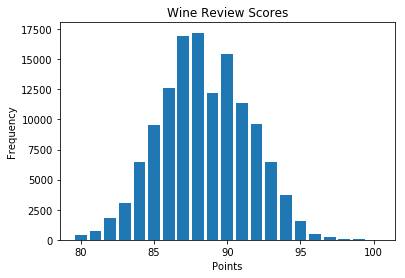

In [10]:
fig, ax = plt.subplots()
data = wine_reviews['points'].value_counts()
points = data.index
frequency = data.values
ax.bar(points, frequency)
ax.set_title('Wine Review Scores')
ax.set_xlabel('Points')
ax.set_ylabel('Frequency')

## Pandas Visualization

Pandas uses Matplotlib and makes it easy to plot Data

### Scatter Plot

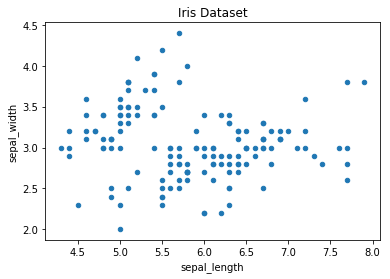

In [11]:
iris.plot.scatter(x='sepal_length', y='sepal_width', title='Iris Dataset')

### Line Chart

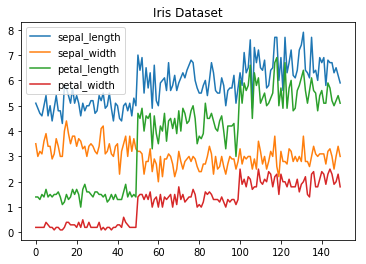

In [12]:
iris.drop(['class'], axis=1).plot.line(title='Iris Dataset')

### Histogram

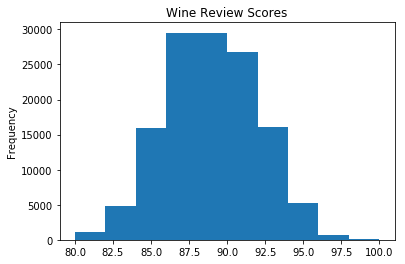

In [13]:
wine_reviews['points'].plot.hist(title='Wine Review Scores')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000276C8C90A90>,
      dtype=object)

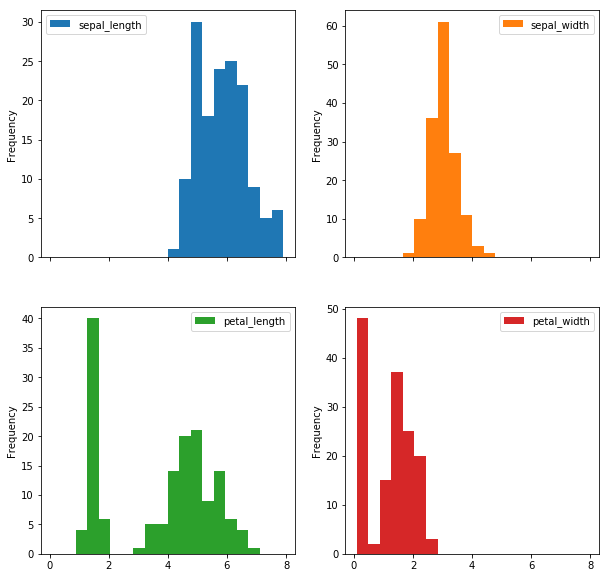

In [14]:
iris.plot.hist(subplots=True, layout=(2,2), figsize=(10, 10), bins=20)

### Bar Chart

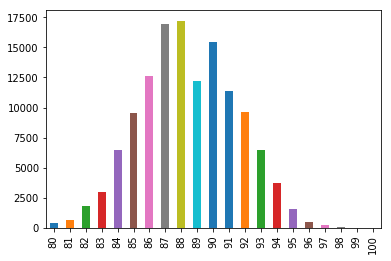

In [15]:
wine_reviews['points'].value_counts().sort_index().plot.bar()

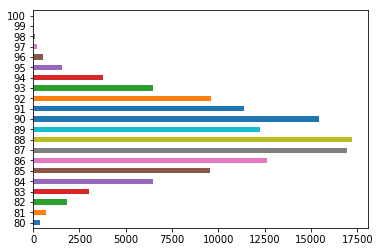

In [16]:
wine_reviews['points'].value_counts().sort_index().plot.barh()

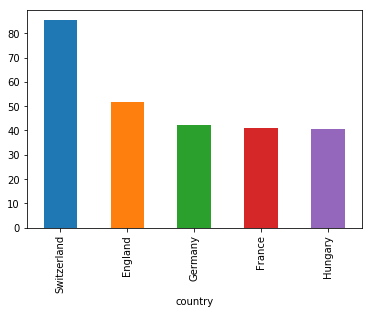

In [17]:
wine_reviews.groupby("country").price.mean().sort_values(ascending=False)[:5].plot.bar()

## Seaborn

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

### Scatter plot

In [18]:
import seaborn as sns
sns.__version__

'0.9.0'

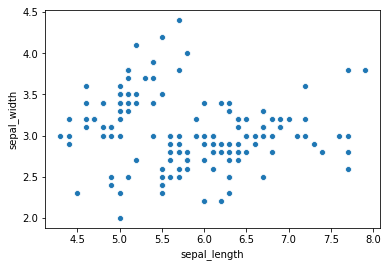

In [19]:
sns.scatterplot(x='sepal_length', y='sepal_width', data=iris)

Highlighting the classes is significally easier than using Matplotlib. We only need to specify the hue parameter.

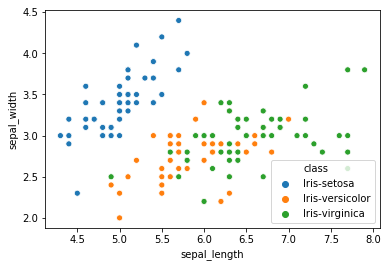

In [20]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='class', data=iris)

### Line chart

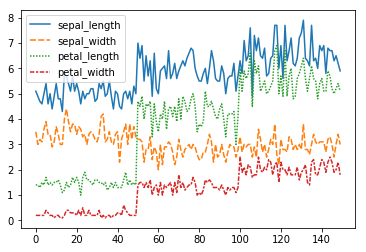

In [21]:
sns.lineplot(data=iris.drop(['class'], axis=1))

### Histogram

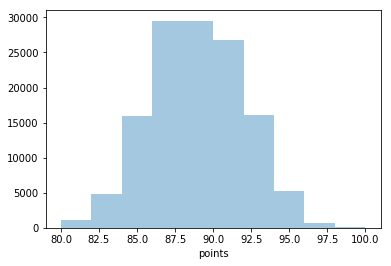

In [22]:
sns.distplot(wine_reviews['points'], bins=10, kde=False)

C:\Users\Gilbert\Anaconda3\envs\machine_learning\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


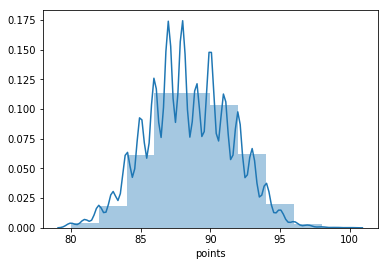

In [23]:
sns.distplot(wine_reviews['points'], bins=10, kde=True)

### Bar chart

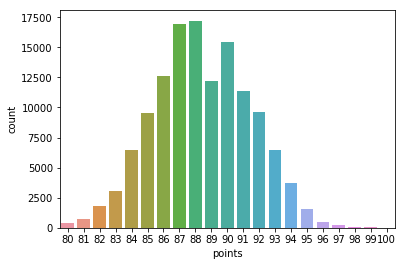

In [24]:
sns.countplot(wine_reviews['points'])

## More advanced graphs 

Now that you have a basic understanding about the syntax of Matplotlib, Pandas Visualization and Seaborn I want to show you a few other graph types useful for data science and machine learning. For most of them Seaborn is the go to library because you can use it to make complicated graphs with almost no lines of code.

### Box Plots

Box Plots are useful to show distributions with respect to categories.

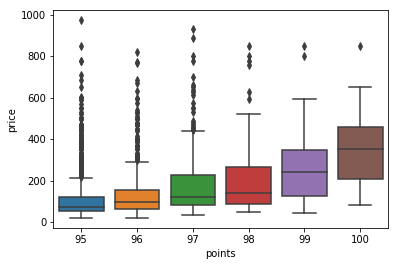

In [25]:
df = wine_reviews[(wine_reviews['points']>=95) & (wine_reviews['price']<1000)]
sns.boxplot('points', 'price', data=df)

## Pie Plots

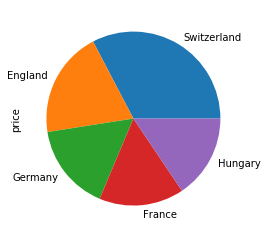

In [26]:
wine_reviews.groupby("country").price.mean().sort_values(ascending=False)[:5].plot.pie()

### Heatmap

Heatmaps are perfect for exploring the correlation of the features

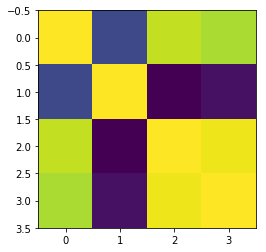

In [27]:
corr = iris.corr()
fig, ax = plt.subplots()
im = ax.imshow(corr.values)

[None, None, None, None, None, None, None, None]

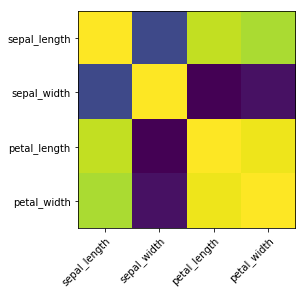

In [28]:
# get correlation matrix
corr = iris.corr()
fig, ax = plt.subplots()
# create heatmap
im = ax.imshow(corr.values)

# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

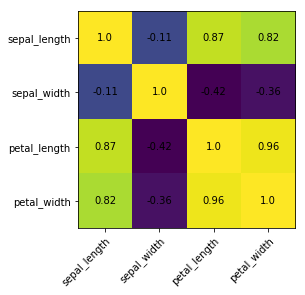

In [29]:
# get correlation matrix
corr = iris.corr()
fig, ax = plt.subplots()
# create heatmap
im = ax.imshow(corr.values)

# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = ax.text(j, i, np.around(corr.iloc[i, j], decimals=2),
                       ha="center", va="center", color="black")

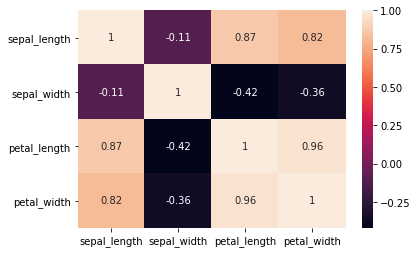

In [30]:
sns.heatmap(iris.corr(), annot=True)

We can make plots bigger by using the figsize parameter from matplotlib. To use it with Seaborn we need to pass the seaborn function we are using the matplotlib axis as an argument.

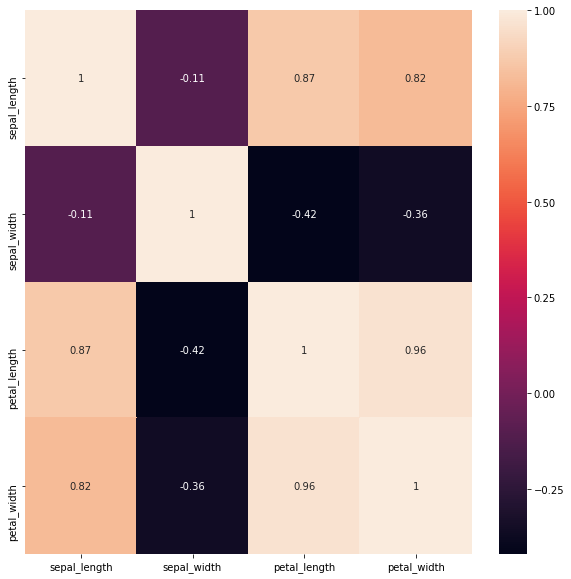

In [31]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(iris.corr(), annot=True, ax=ax)

## Faceting

Faceting is the act of breaking data variables up across multiple subplots, and combining those subplots into a single figure.

### FacetGrid

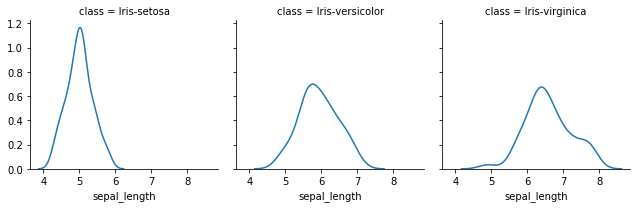

In [32]:
g = sns.FacetGrid(iris, col='class')
g = g.map(sns.kdeplot, 'sepal_length')

### Pairplot

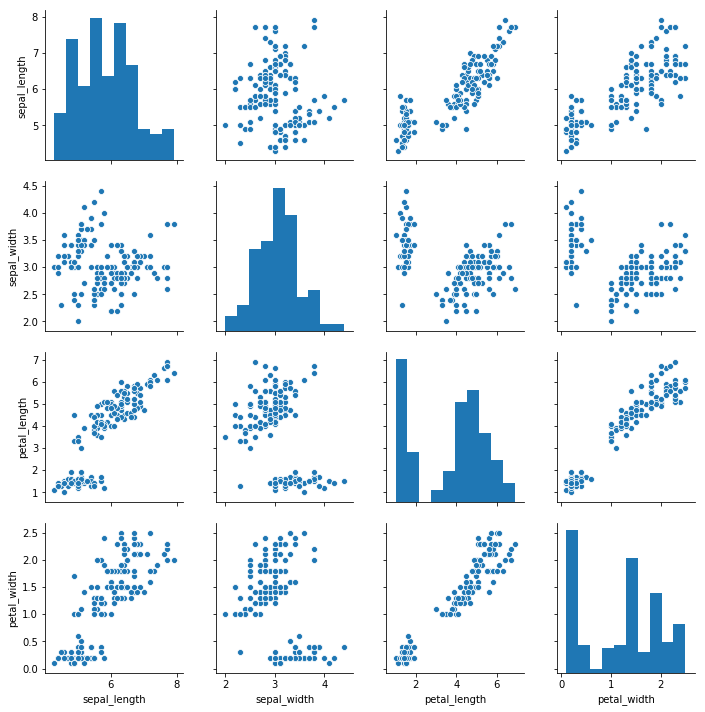

In [33]:
sns.pairplot(iris)

C:\Users\Gilbert\Anaconda3\envs\machine_learning\lib\site-packages\IPython\core\interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


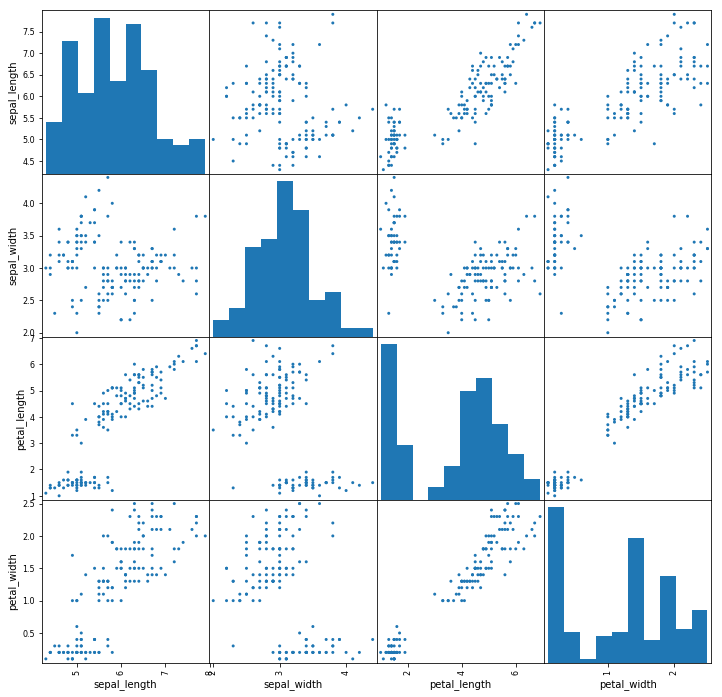

In [34]:
from pandas.plotting import scatter_matrix

fig, ax = plt.subplots(figsize=(12,12))
scatter_matrix(iris, alpha=1, ax=ax);

That's all from this tutorial I hope you got an intuition about some tools you can use for visualizing data. If you like it consider subscribing on [Youtube](https://www.youtube.com/channel/UCBOKpYBjPe2kD8FSvGRhJwA). If you want to see a full series on any of the tools used in this tutorial leave a comment underneath one of my Videos or dm me on [Twitter](https://twitter.com/Tanner__Gilbert)